In [ ]:
import requests
import pandas as pd

# API endpoint
url = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"

# Parameters to retrieve a large dataset
params = {
    "$limit": 1000000,  # 1 million per request; you can iterate multiple times if needed
    "$$app_token": "",  # Optional app token
}

# Make the request
response = requests.get(url, params=params)

# Convert to DataFrame
data = response.json()
df = pd.DataFrame(data)

# Save to CSV for easier access later
df.to_csv("chicago_crime_data.csv", index=False)

# Preview
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
0,13809083,JJ222182,2025-04-17T00:00:00.000,007XX W JACKSON BLVD,0760,BURGLARY,BURGLARY FROM MOTOR VEHICLE,STREET,False,False,...,"{'latitude': '41.877981539', 'longitude': '-87...",48,4452,29,786,36,45,22,91,34
1,13809110,JJ222172,2025-04-17T00:00:00.000,0000X W 79TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,CTA PLATFORM,True,False,...,"{'latitude': '41.750940757', 'longitude': '-87...",31,21554,67,495,32,59,20,228,4
2,13809044,JJ222168,2025-04-17T00:00:00.000,0000X E OHIO ST,0870,THEFT,POCKET-PICKING,RESTAURANT,False,False,...,"{'latitude': '41.892509386', 'longitude': '-87...",22,21182,37,626,36,6,14,74,42
3,13812626,JJ226018,2025-04-17T00:00:00.000,0000X W 69TH ST,0820,THEFT,$500 AND UNDER,CTA TRAIN,False,False,...,"{'latitude': '41.769185486', 'longitude': '-87...",31,22260,67,513,32,11,17,201,4
4,13808210,JJ221075,2025-04-16T23:56:00.000,015XX N KEELER AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,ALLEY,False,False,...,"{'latitude': '41.90902089', 'longitude': '-87....",27,4299,24,286,49,5,6,194,36


In [ ]:
print(df.columns)

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', ':@computed_region_awaf_s7ux',
       ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu',
       ':@computed_region_rpca_8um6', ':@computed_region_d9mm_jgwp',
       ':@computed_region_d3ds_rm58', ':@computed_region_8hcu_yrd4'],
      dtype='object')


In [ ]:
print(df.shape)

(1000000, 31)


In [ ]:
# Convert date column to datetime format (adjust 'date' if your column name is different)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year
df['year'] = df['date'].dt.year

# Show all unique years in the dataset
unique_years = sorted(df['year'].dropna().unique())
print("Years in dataset:", unique_years)
print("Total number of years:", len(unique_years))

Years in dataset: [np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
Total number of years: 5


In [ ]:
#Data Preprocessing & Cleaning
# Load the dataset
df = pd.read_csv("chicago_crime_data.csv")

# Display basic info
print("Initial shape:", df.shape)
print("Columns:\n", df.columns)


Initial shape: (1000000, 31)
Columns:
 Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', ':@computed_region_awaf_s7ux',
       ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu',
       ':@computed_region_rpca_8um6', ':@computed_region_d9mm_jgwp',
       ':@computed_region_d3ds_rm58', ':@computed_region_8hcu_yrd4'],
      dtype='object')


In [ ]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Handle missing values
missing_summary = df.isnull().sum()
print("\nMissing values per column:\n", missing_summary)

# Drop columns with excessive missing data or those not useful for EDA
columns_to_drop = ['x_coordinate', 'y_coordinate', 'location_description', 'updated_on', 'location']  # location contains lat/lon separately
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Drop rows where essential fields are missing
essential_fields = ['date', 'primary_type', 'latitude', 'longitude']
df.dropna(subset=essential_fields, inplace=True)

# Convert data types
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # parse date column
df = df[df['date'].notnull()]  # drop rows with invalid dates

# Extract useful date parts
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()

#Standardize column names (optional)
df.columns = df.columns.str.lower().str.strip()

# Final cleaned data shape
print("\nFinal shape after cleaning:", df.shape)
df.head()


Missing values per column:
 id                                 0
case_number                        0
date                               0
block                              0
iucr                               0
primary_type                       0
description                        0
location_description            4437
arrest                             0
domestic                           0
beat                               0
district                           0
ward                              22
community_area                     3
fbi_code                           0
x_coordinate                   12587
y_coordinate                   12587
year                               0
updated_on                         0
latitude                       12587
longitude                      12587
location                       12587
:@computed_region_awaf_s7ux    16326
:@computed_region_6mkv_f3dw    12587
:@computed_region_vrxf_vc4k    15860
:@computed_region_bdys_3d7i    16107
:@compute

,id,case_number,date,block,iucr,primary_type,description,arrest,domestic,beat,...,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4,month,day,hour,weekday
0,13809083,JJ222182,2025-04-17 00:00:00,007XX W JACKSON BLVD,0760,BURGLARY,BURGLARY FROM MOTOR VEHICLE,False,False,121,...,786.0,36.0,45.0,22.0,91.0,34.0,4,17,0,Thursday
1,13809110,JJ222172,2025-04-17 00:00:00,0000X W 79TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,True,False,623,...,495.0,32.0,59.0,20.0,228.0,4.0,4,17,0,Thursday
2,13809044,JJ222168,2025-04-17 00:00:00,0000X E OHIO ST,0870,THEFT,POCKET-PICKING,False,False,1834,...,626.0,36.0,6.0,14.0,74.0,42.0,4,17,0,Thursday
3,13812626,JJ226018,2025-04-17 00:00:00,0000X W 69TH ST,0820,THEFT,$500 AND UNDER,False,False,731,...,513.0,32.0,11.0,17.0,201.0,4.0,4,17,0,Thursday
4,13808210,JJ221075,2025-04-16 23:56:00,015XX N KEELER AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,False,False,2534,...,286.0,49.0,5.0,6.0,194.0,36.0,4,16,23,Wednesday


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract time components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Set plot style
sns.set(style="whitegrid")


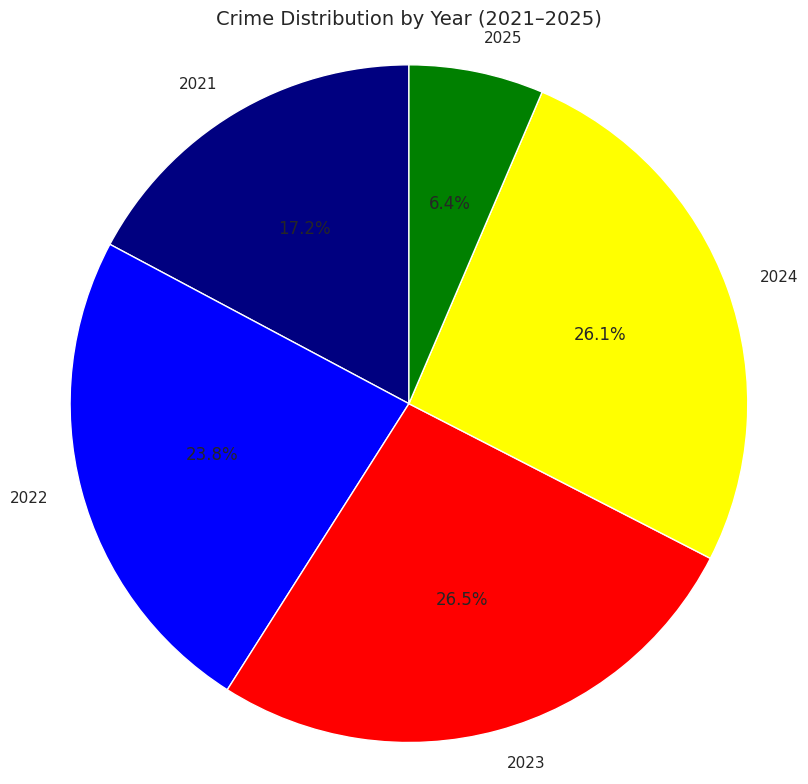

In [ ]:
#Crimes Per Year (2021–2025)
# Count crimes per year and sort by crime volume descending
year_counts = df['year'].value_counts().sort_index()
year_counts = year_counts[(year_counts.index >= 2021) & (year_counts.index <= 2025)]

# Sort years by crime count to assign colors accordingly
year_counts_sorted = year_counts.sort_values(ascending=False)

# Define custom colors: red (highest), yellow, blue, navy, green
custom_colors = ['red', 'yellow', 'blue', 'navy', 'green']

# Reindex original counts to match the order of custom colors
year_counts = year_counts_sorted.sort_index()  # keep original order in labels
colors = [custom_colors[list(year_counts_sorted.index).index(y)] for y in year_counts.index]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    year_counts.values,
    labels=year_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Crime Distribution by Year (2021–2025)", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

<ipython-input-48-95e43411f173>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette=sns.color_palette("plasma", len(month_counts)))


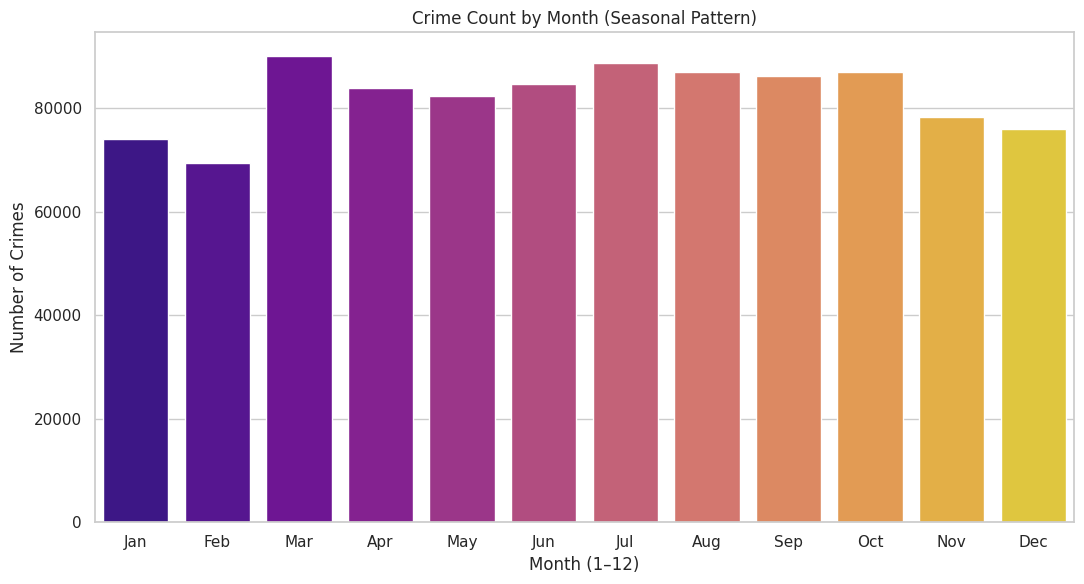

In [ ]:
#Crimes by Month (All Years Combined)
#Ensure the 'month' column is extracted correctly
df['month'] = pd.to_datetime(df['date'], errors='coerce').dt.month

# Count crimes by month
month_counts = df['month'].value_counts().sort_index()

# Plot with a gradient color palette
plt.figure(figsize=(11, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette=sns.color_palette("plasma", len(month_counts)))

plt.title("Crime Count by Month (Seasonal Pattern)")
plt.xlabel("Month (1–12)")
plt.ylabel("Number of Crimes")
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.tight_layout()
plt.show()

<ipython-input-49-738d9f1d72ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette=sns.color_palette("Spectral", len(hour_counts)))


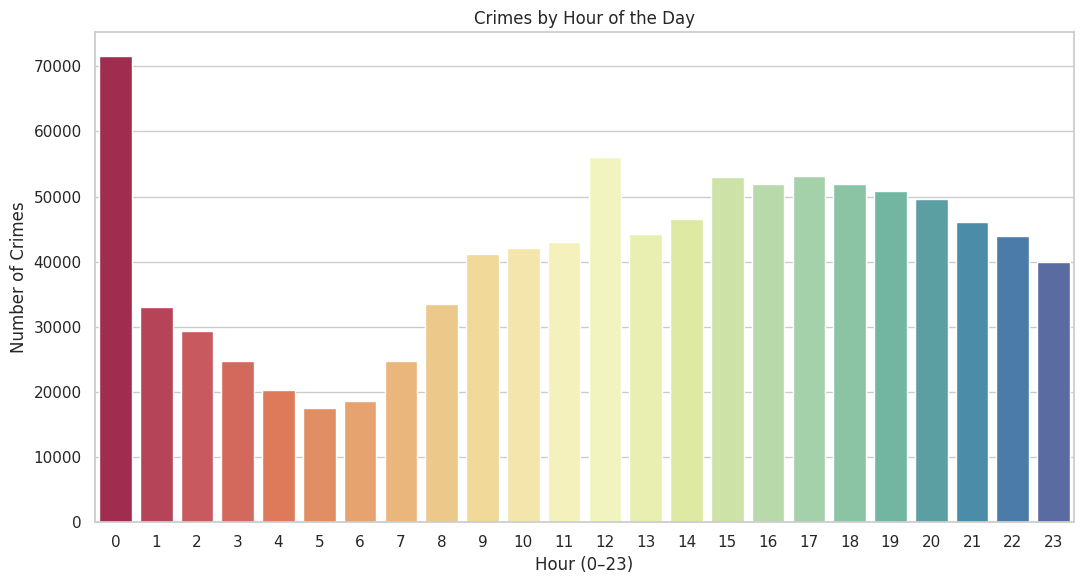

In [ ]:
# Extract hour from the date/time field
df['hour'] = pd.to_datetime(df['date'], errors='coerce').dt.hour

# Count number of crimes per hour
hour_counts = df['hour'].value_counts().sort_index()

# Plot with a color gradient
plt.figure(figsize=(11, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette=sns.color_palette("Spectral", len(hour_counts)))

plt.title("Crimes by Hour of the Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

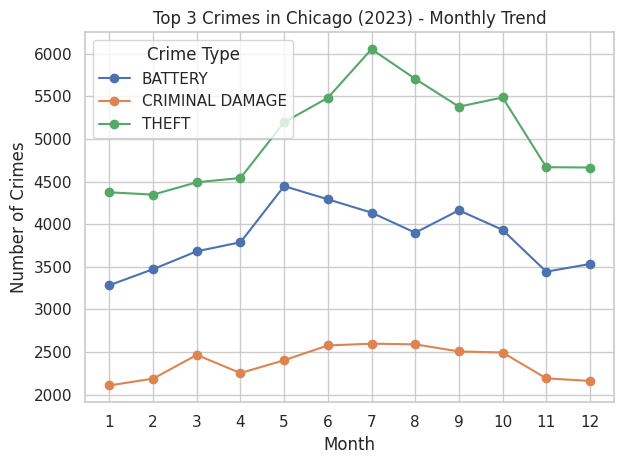

In [ ]:
# Ensure month column exists
df['month'] = df['date'].dt.month

# Filter for year 2023
df_2023 = df[df['year'] == 2024]

# Get the top 3 most common crimes
top_3_crimes = df_2023['primary_type'].value_counts().nlargest(3).index

# Filter for only top 3 crimes
df_top_3 = df_2023[df_2023['primary_type'].isin(top_3_crimes)]

# Group by month and crime type, then count
monthly_trends = df_top_3.groupby(['month', 'primary_type']).size().unstack()

# Plot
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o')

plt.title("Top 3 Crimes in Chicago (2023) - Monthly Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure months 1–12 appear
plt.tight_layout()
plt.show()

In [ ]:
#Arrest Likelihood by Crime Type
#policing effectiveness and patterns in law enforcement response
# Group by crime type and arrest status
arrest_stats = df.groupby(['primary_type', 'arrest']).size().unstack(fill_value=0)

# Calculate arrest rate
arrest_stats['arrest_rate'] = arrest_stats[True] / (arrest_stats[True] + arrest_stats[False])

# Sort by arrest rate descending
arrest_stats_sorted = arrest_stats.sort_values('arrest_rate', ascending=False)

# Show top 15
arrest_stats_sorted[['arrest_rate']].head(15)

arrest,arrest_rate
primary_type,
LIQUOR LAW VIOLATION,0.975000
NARCOTICS,0.968958
CONCEALED CARRY LICENSE VIOLATION,0.967073
GAMBLING,0.966102
PROSTITUTION,0.965405
PUBLIC INDECENCY,0.892857
INTERFERENCE WITH PUBLIC OFFICER,0.879271
WEAPONS VIOLATION,0.612575
OBSCENITY,0.535519


<ipython-input-14-d2aa79386082>:16: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


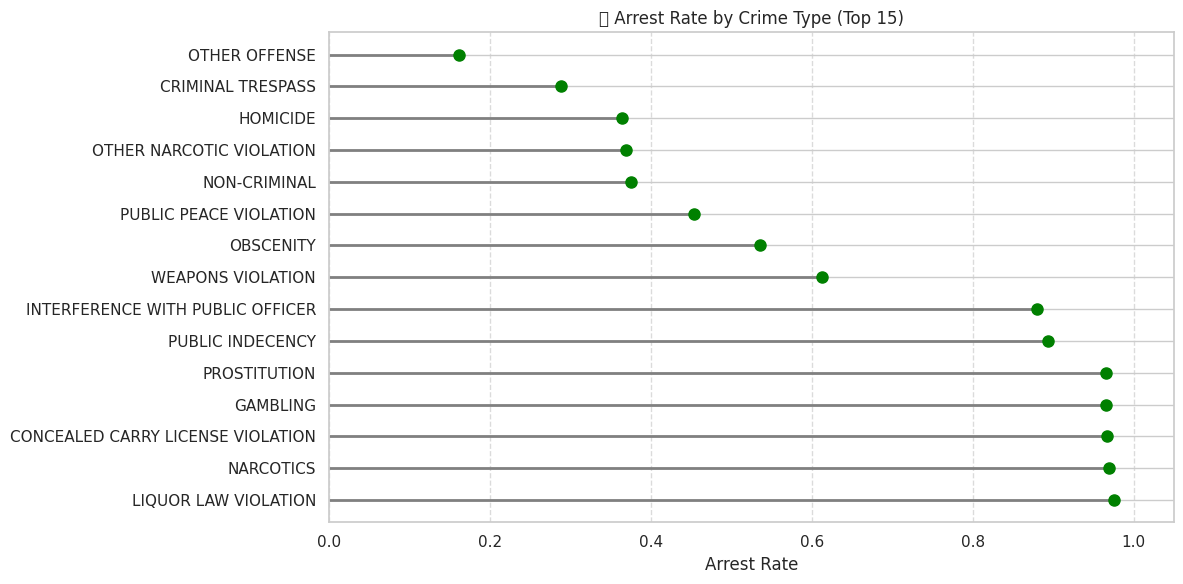

In [ ]:
# Prepare top 15 arrest rates
top15 = arrest_stats_sorted['arrest_rate'].head(15)
crime_types = top15.index
rates = top15.values

# Plot
plt.figure(figsize=(12, 6))
plt.hlines(y=crime_types, xmin=0, xmax=rates, color='gray', linewidth=2)
plt.plot(rates, crime_types, "o", color='green', markersize=8)

# Labels and formatting
plt.xlabel("Arrest Rate")
plt.title("🔒 Arrest Rate by Crime Type (Top 15)")
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-20-4ff4cf3e77da>:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chicago_gdf['coords'] = chicago_gdf['geometry'].centroid
<ipython-input-20-4ff4cf3e77da>:38: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


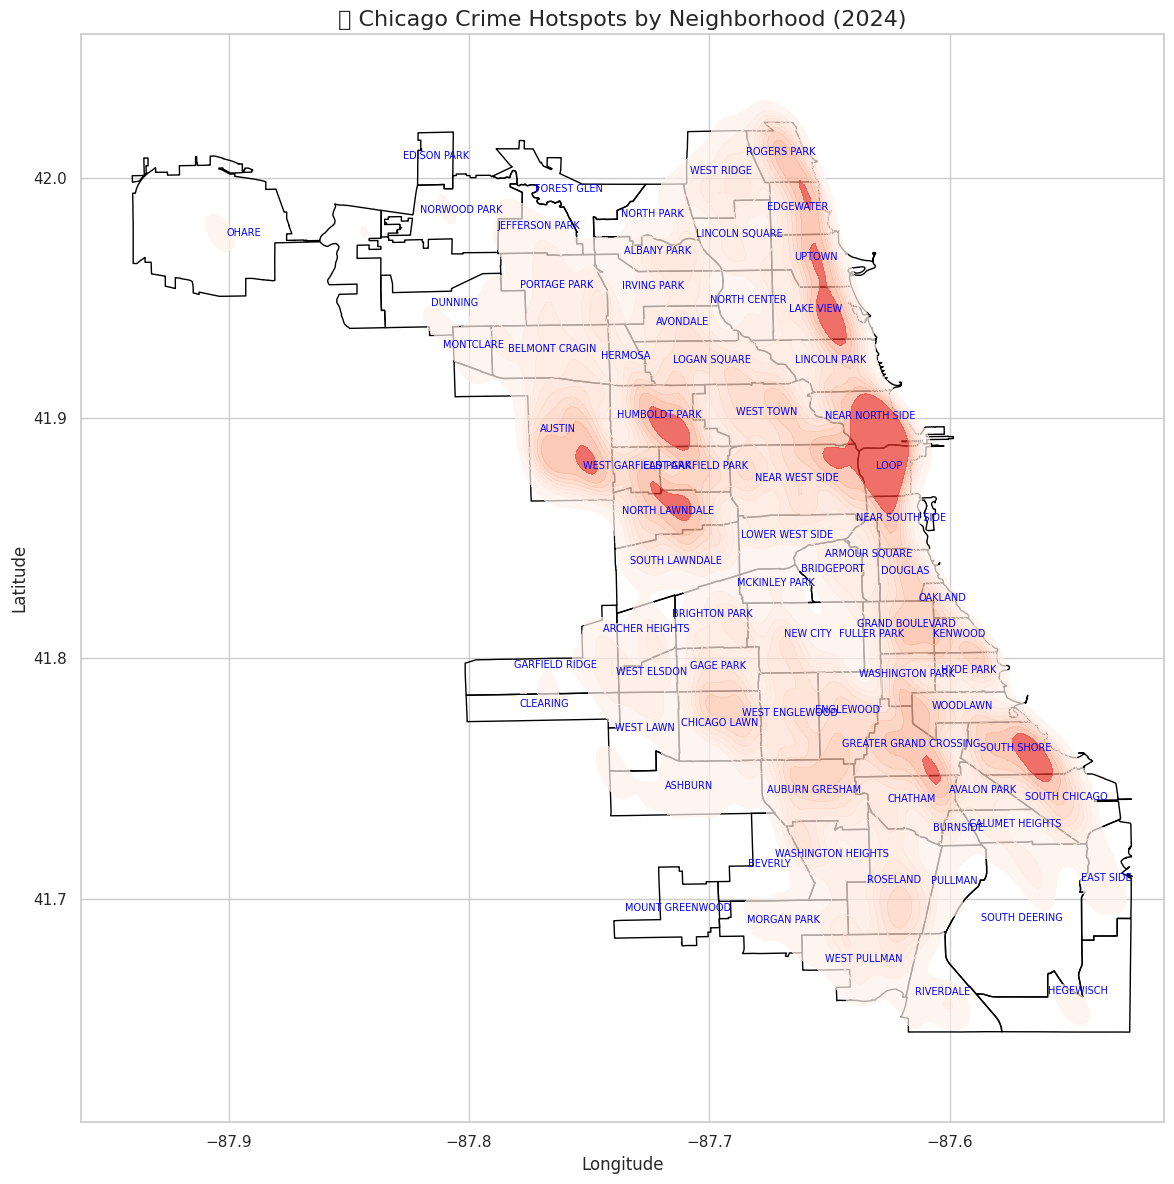

In [ ]:
# Crime concenctration Areas in 2024
import geopandas as gpd

# Step 1: Prepare and clean crime data
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['longitude', 'latitude'])
df_2024 = df[df['date'].dt.year == 2024]
sample_2024 = df_2024[['longitude', 'latitude']].sample(n=min(10000, len(df_2024)), random_state=42)

# Step 2: Load the GeoJSON from the mounted path
chicago_gdf = gpd.read_file("/content/chicago-community-areas.geojson")

# Step 3: Plot heatmap over community boundaries
fig, ax = plt.subplots(figsize=(12, 12))
chicago_gdf.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

sns.kdeplot(
    x=sample_2024['longitude'],
    y=sample_2024['latitude'],
    cmap="Reds",
    fill=True,
    bw_adjust=0.4,
    thresh=0.05,
    alpha=0.7,
    ax=ax
)

# Add community area labels
chicago_gdf['coords'] = chicago_gdf['geometry'].centroid
for _, row in chicago_gdf.iterrows():
    plt.text(row['coords'].x, row['coords'].y, row['community'], fontsize=7, ha='center', color='blue')

# Final formatting
plt.title("📍 Chicago Crime Hotspots by Neighborhood (2024)", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
!pip install adjustText

<ipython-input-28-084541c68af7>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


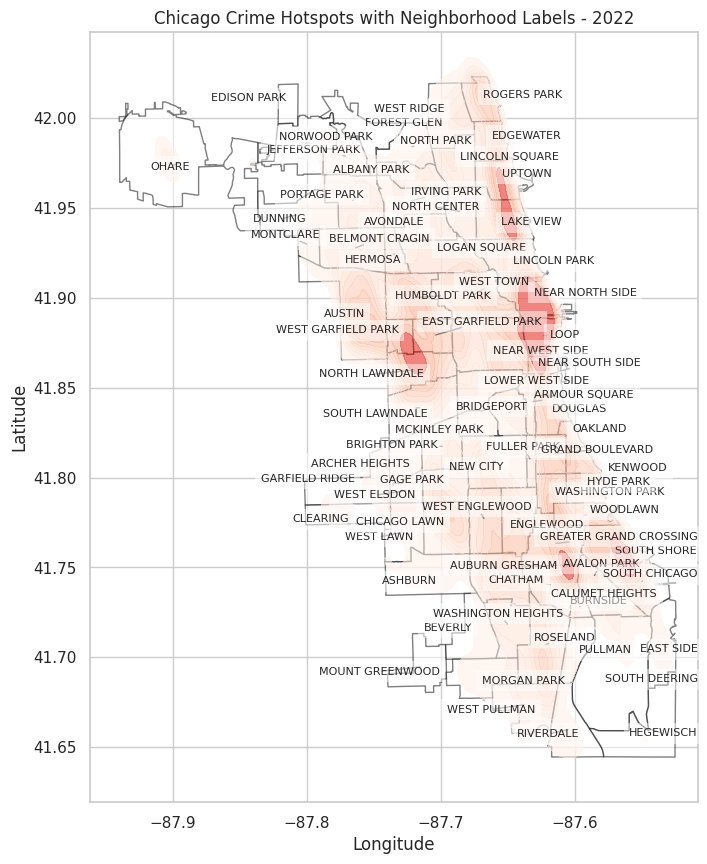

<ipython-input-28-084541c68af7>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


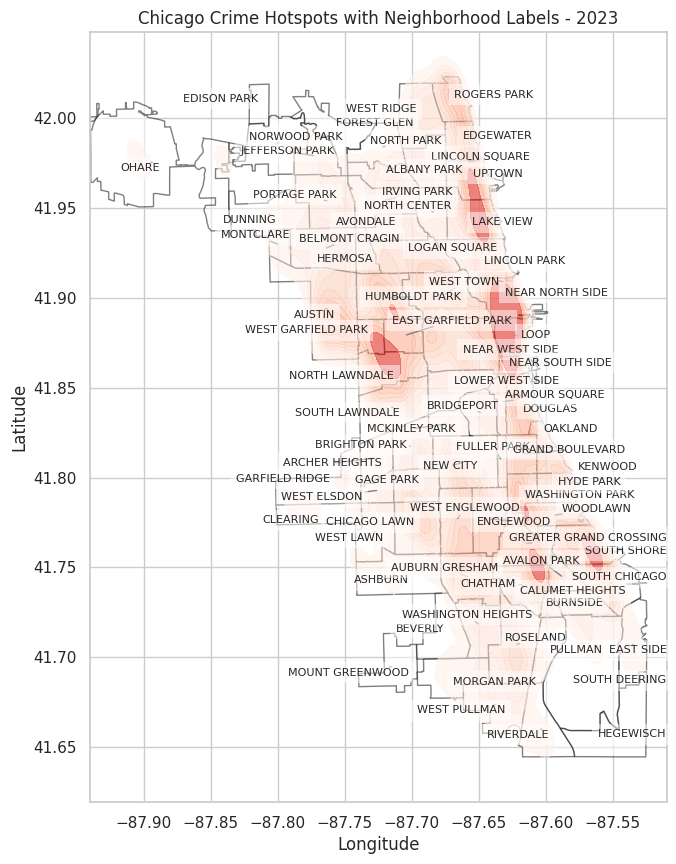

<ipython-input-28-084541c68af7>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


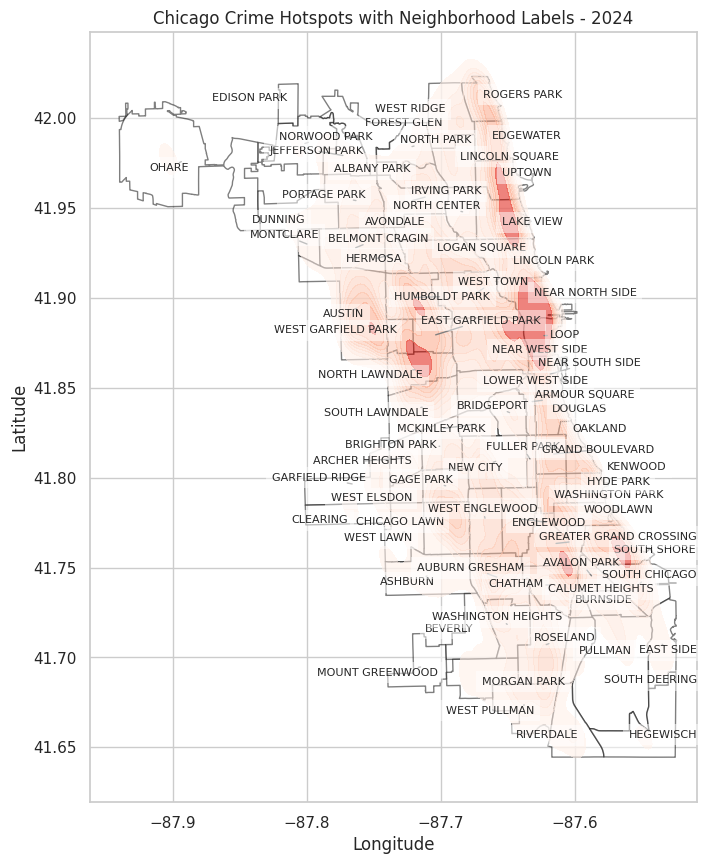

<ipython-input-28-084541c68af7>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


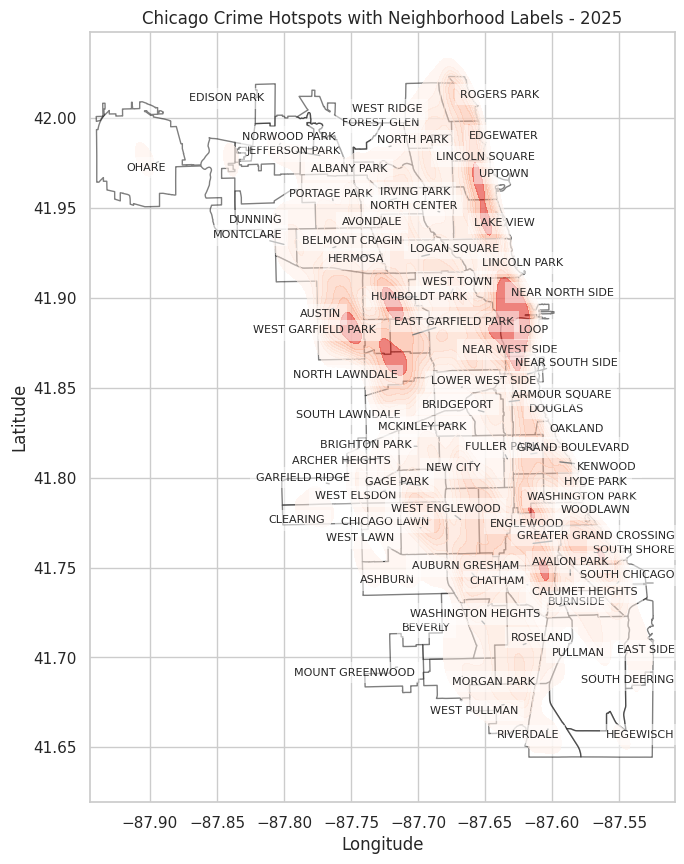

In [ ]:
from adjustText import adjust_text
import geopandas as gpd
# Load shapefile
gdf_chicago = gpd.read_file('/content/chicago-community-areas.geojson')

# Pick your column name for labels (e.g., 'community', 'name', etc.)
label_column = 'community'  # Change this based on your actual column name

# Plot KDE + smart text placement
years = [2022, 2023, 2024, 2025]

for year in years:
    df_year = df_geo[df_geo['date'].dt.year == year]
    sample = df_year[['longitude', 'latitude']].sample(n=20000, random_state=42) if len(df_year) > 20000 else df_year[['longitude', 'latitude']]

    fig, ax = plt.subplots(figsize=(12, 10))

    # Plot community areas
    gdf_chicago.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)

    # KDE Plot
    sns.kdeplot(
        x=sample['longitude'],
        y=sample['latitude'],
        cmap='Reds',
        shade=True,
        alpha=0.6,
        ax=ax,
        bw_adjust=0.5,
        thresh=0.05
    )

    # Add smart labels
    texts = []
    for _, row in gdf_chicago.iterrows():
        centroid = row.geometry.centroid
        texts.append(ax.text(
            centroid.x,
            centroid.y,
            str(row[label_column]),
            fontsize=8,
            ha='center',
            va='center',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
        ))

    # Adjust to avoid overlap
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

    plt.title(f"Chicago Crime Hotspots with Neighborhood Labels - {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

In [ ]:
#Crime Risk Around Public Institutions (Schools, Parks, Hospitals)
#Filter Crimes Around Public Institutions
# API with selected columns including location_description
url = "https://data.cityofchicago.org/resource/ijzp-q8t2.json?$where=date>'2015-01-01T00:00:00'&$limit=100000&$select=id,date,primary_type,arrest,location_description,latitude,longitude"

# Fetch the data
import requests
import pandas as pd

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# Clean it up
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['location_description'])
df['location_description'] = df['location_description'].str.lower()

# Confirm column exists
print(df['location_description'].unique()[:10])

['residence' 'apartment' 'church / synagogue / place of worship' 'street'
 'residence-garage' 'vehicle non-commercial' 'sports arena/stadium'
 'other' 'church/synagogue/place of worship'
 'residential yard (front/back)']


<ipython-input-32-f06bff26ce6e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location_description'] = df['location_description'].str.lower()


In [ ]:
# Filter crimes by institution type
parks_df = df[df['location_description'].str.contains('park', na=False)]
schools_df = df[df['location_description'].str.contains('school', na=False)]
hospitals_df = df[df['location_description'].str.contains('hospital', na=False)]

# Create a summary DataFrame
institution_crime_counts = pd.DataFrame({
    'Institution': ['Parks', 'Schools', 'Hospitals'],
    'Crime_Count': [len(parks_df), len(schools_df), len(hospitals_df)]
})

print(institution_crime_counts)

  Institution  Crime_Count
0       Parks         4075
1     Schools         3120
2   Hospitals          395


In [ ]:
# Group by location_description and count crimes
location_counts = df['location_description'].value_counts().reset_index()
location_counts.columns = ['location_description', 'crime_count']

# Normalize for variable width
location_counts['width'] = location_counts['crime_count'] / location_counts['crime_count'].sum()

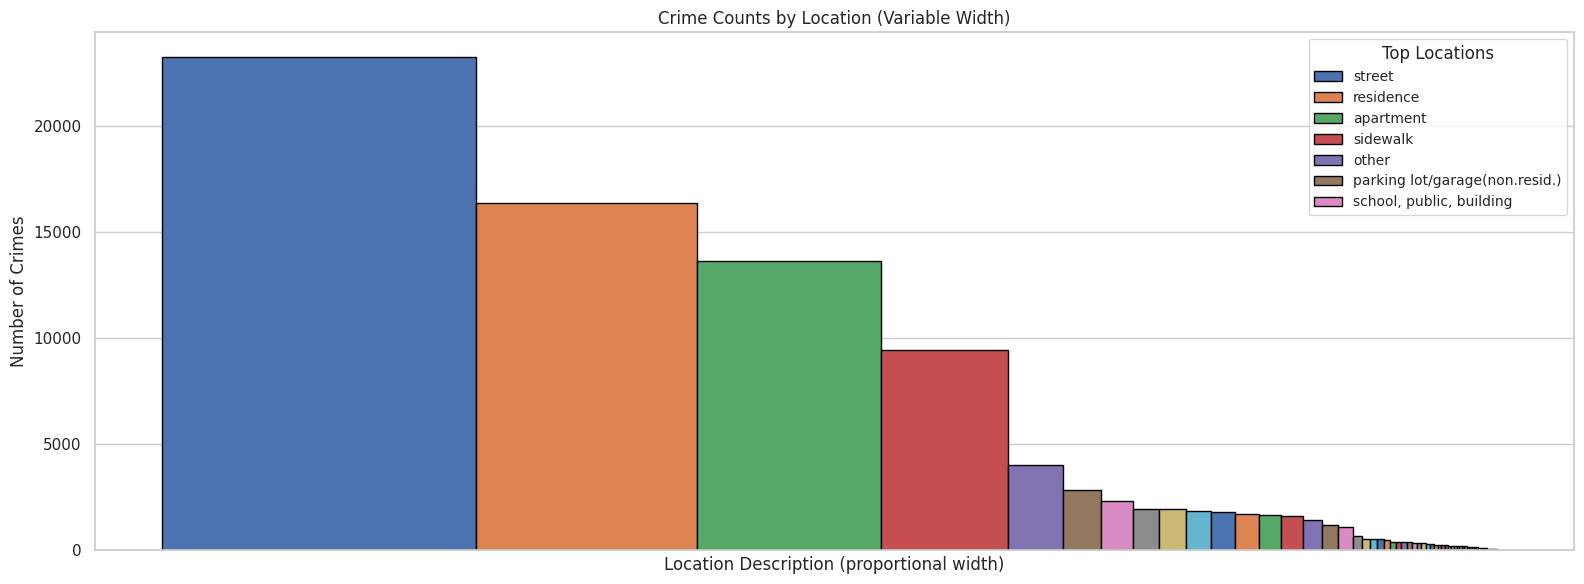

In [ ]:
#Plot the Variable Width Chart
# Create figure
plt.figure(figsize=(16, 6))

# Starting position of bars
x_position = 0

for i, row in location_counts.iterrows():
    plt.bar(
        x=x_position,
        height=row['crime_count'],
        width=row['width'],
        align='edge',
        label=row['location_description'] if row['crime_count'] > 2000 else "",  # Label only major ones
        edgecolor='black'
    )
    x_position += row['width']

plt.xlabel("Location Description (proportional width)")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Location (Variable Width)")
plt.xticks([])  # Hide x-axis labels since width represents location
plt.legend(loc='upper right', fontsize='small', title="Top Locations")
plt.tight_layout()
plt.show()

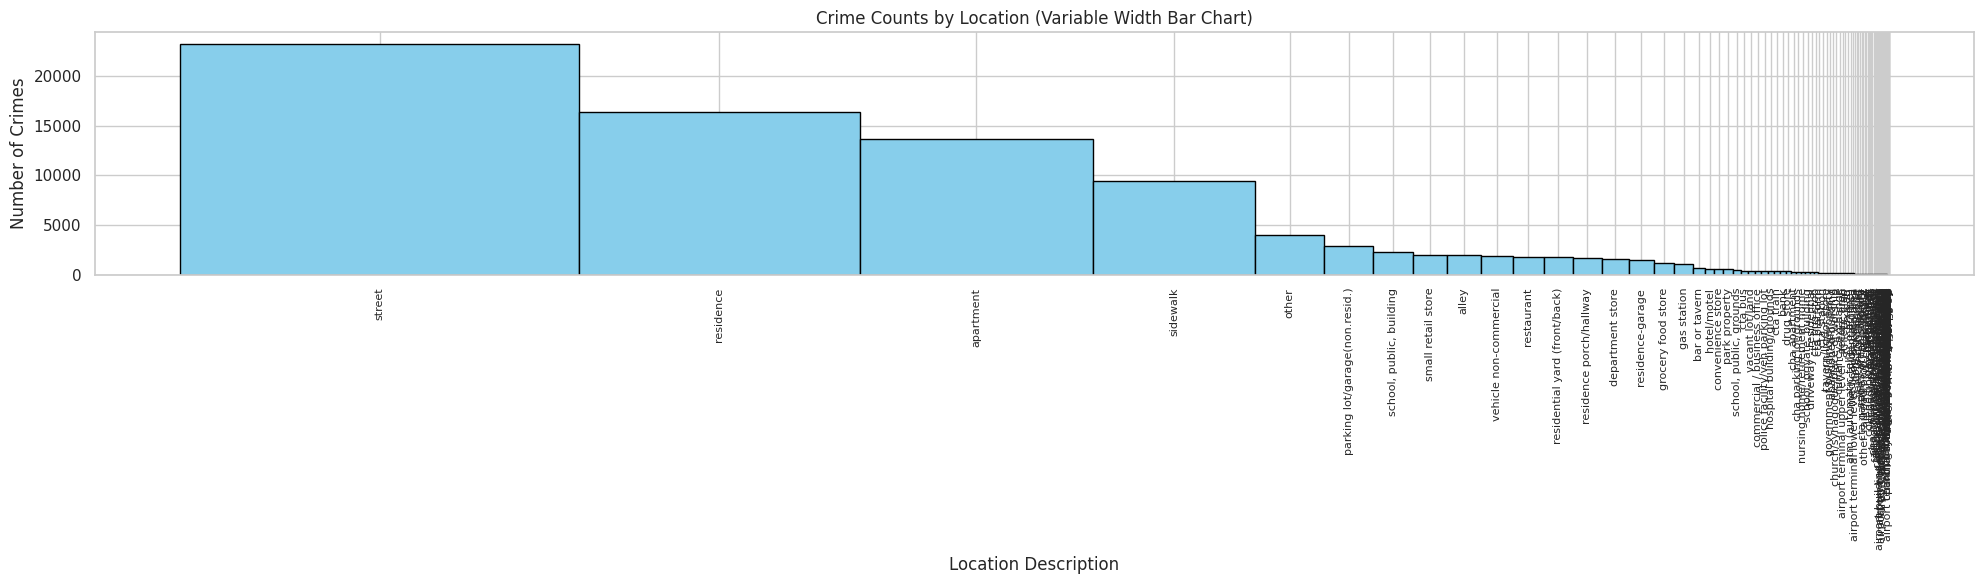

In [ ]:
# Prepare the data again if needed
location_counts = df['location_description'].value_counts().reset_index()
location_counts.columns = ['location_description', 'crime_count']
location_counts['width'] = location_counts['crime_count'] / location_counts['crime_count'].sum()

# Create figure
plt.figure(figsize=(20, 6))

x_position = 0
x_ticks = []
x_labels = []

for i, row in location_counts.iterrows():
    bar = plt.bar(
        x=x_position,
        height=row['crime_count'],
        width=row['width'],
        align='edge',
        color='skyblue',
        edgecolor='black'
    )

    # Center of the bar for labeling
    center = x_position + row['width'] / 2
    x_ticks.append(center)
    x_labels.append(row['location_description'])

    x_position += row['width']

# Apply x-axis labels
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=90, fontsize=8)

plt.xlabel("Location Description")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Location (Variable Width Bar Chart)")
plt.tight_layout()
plt.show()